In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

KeyboardInterrupt: 

In [ ]:
fish2 = pd.read_csv("data/fish2.csv")

fish2

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
X = fish2.iloc[:, 1::].values
y = fish2["Species"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8125

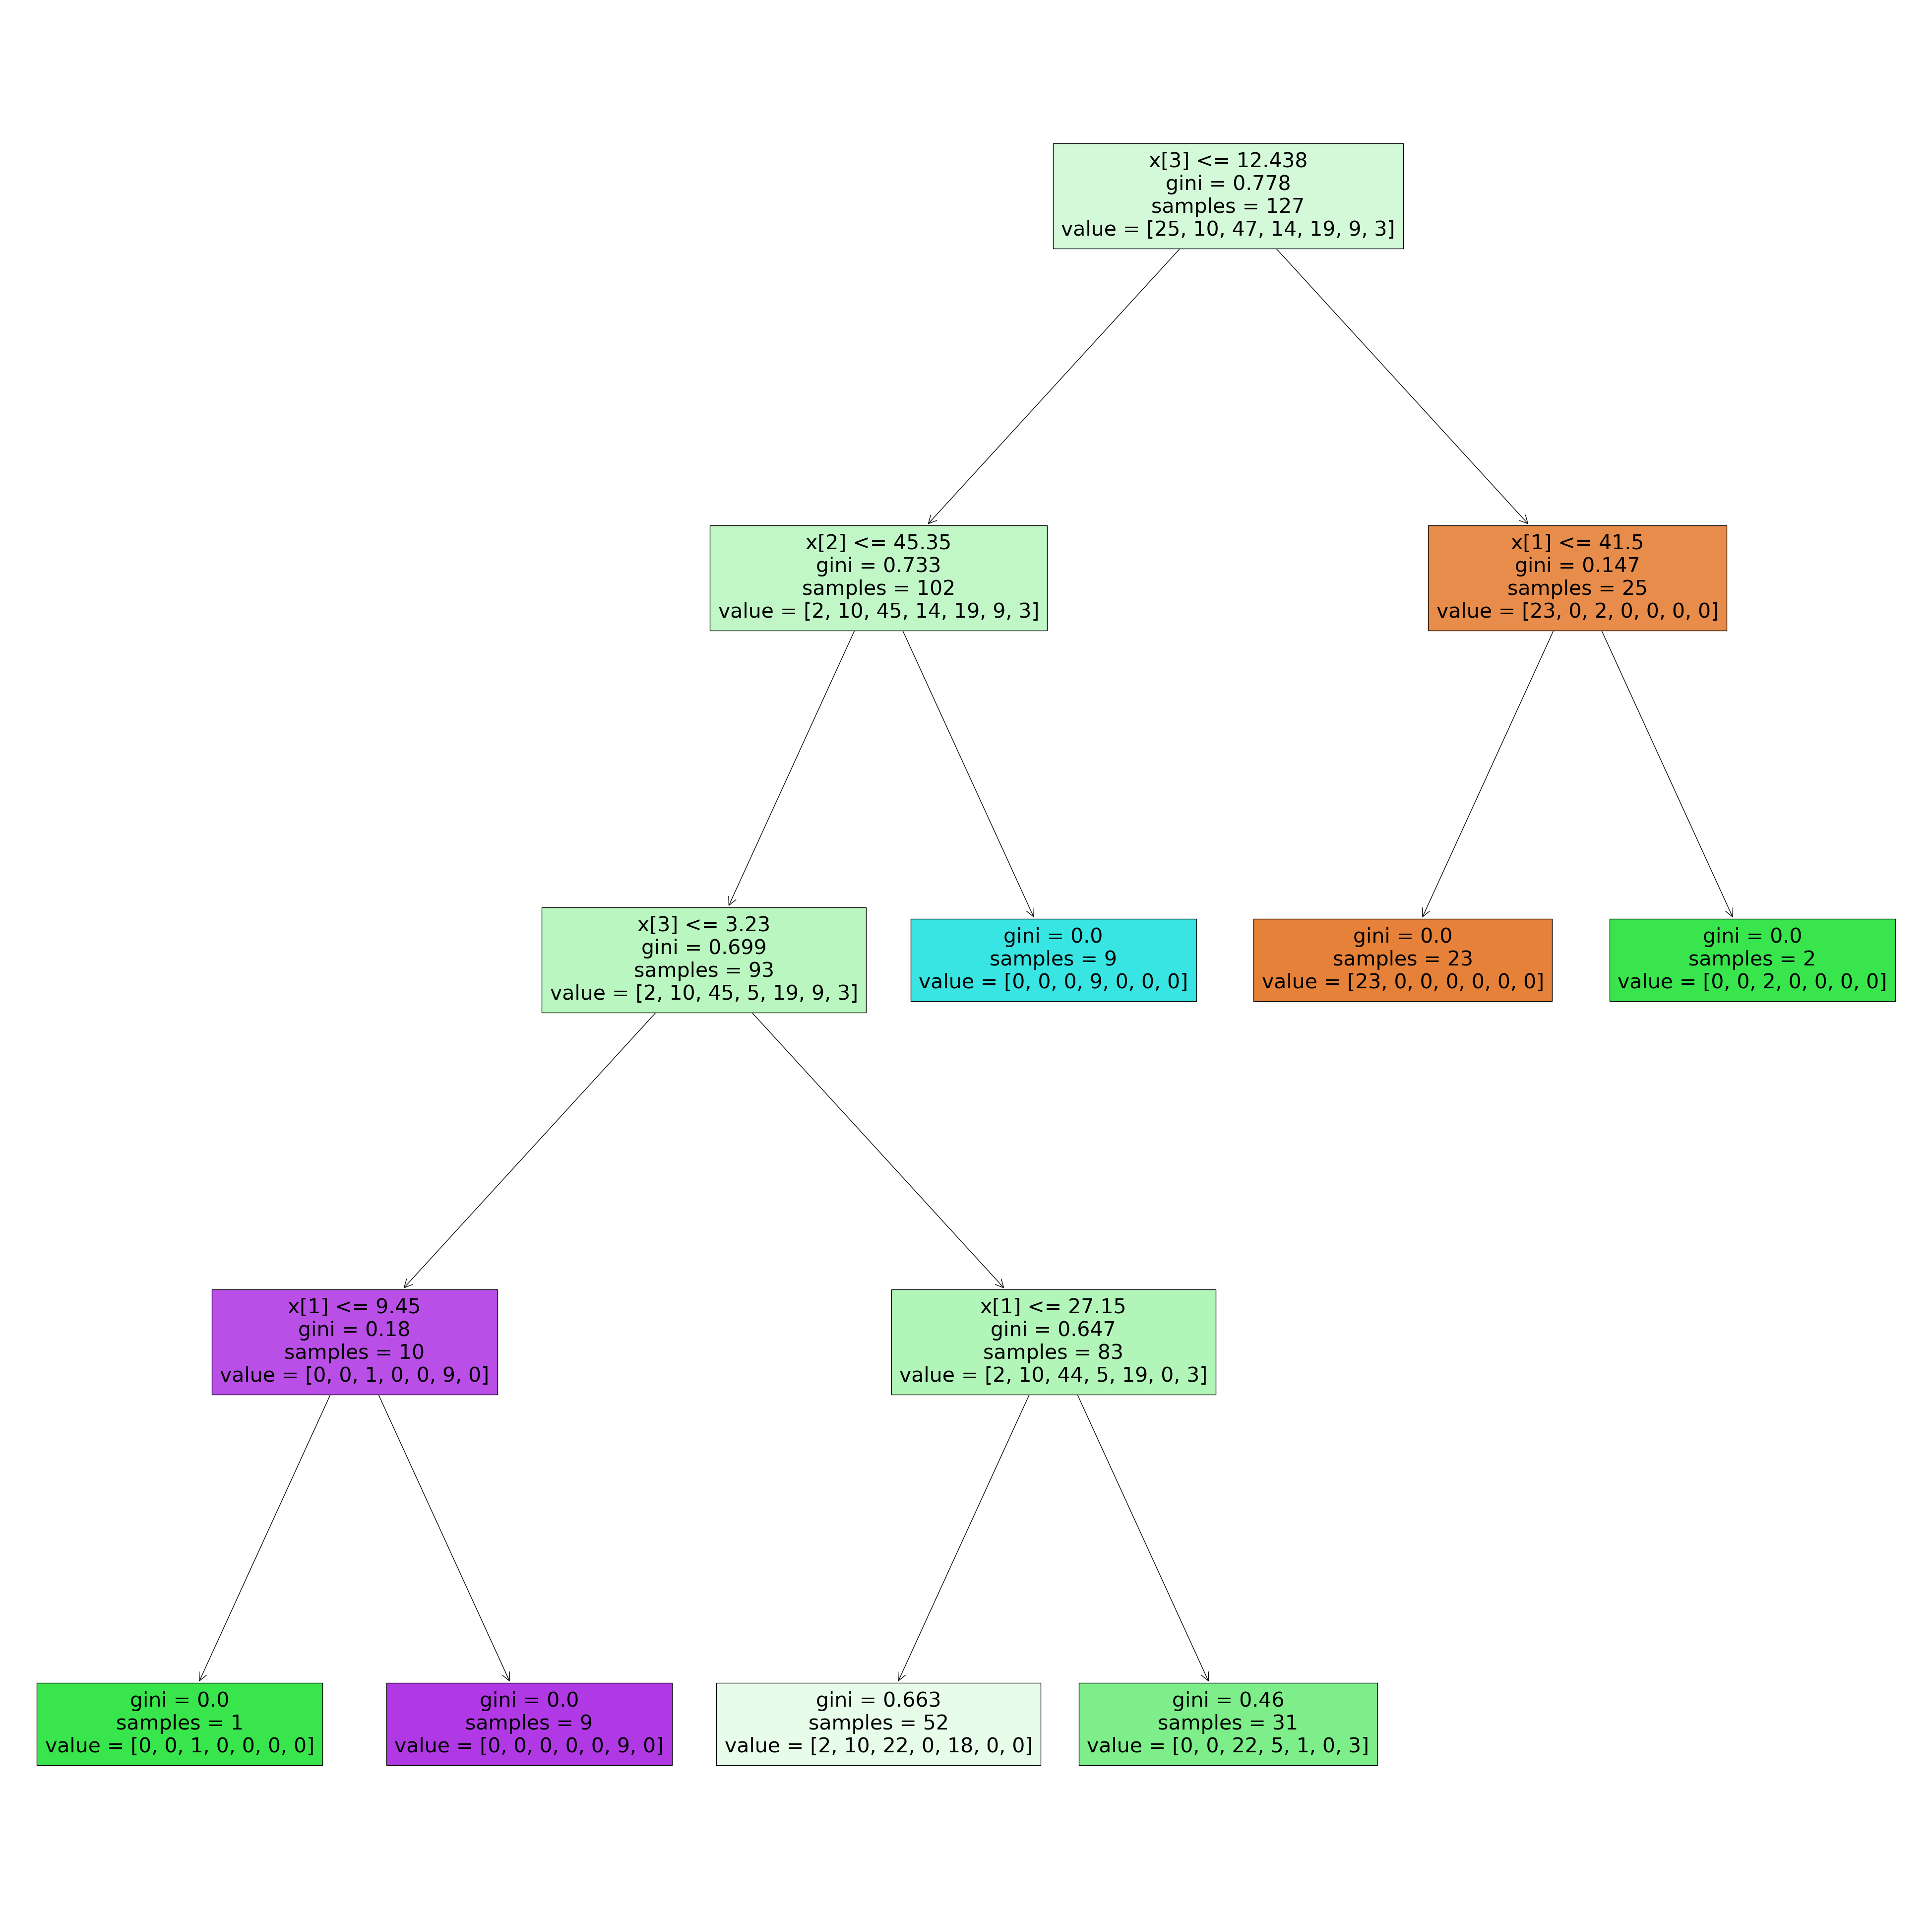

In [ ]:
plt.figure(figsize=(50, 50))
plot_tree(model, filled=True)
plt.show()

In [ ]:
# 너무 과하게 학습: 과대적합 // 차이가 너무 크면, 과대적합
# 학습이 덜 된 모델: 과소적합 // 훈련데이터 정확도 < 시험데이터 정확도, 훈련,시험 정확도가 둘다 낮은 경우 

print(f'Train_dataset accuracy: {model.score(X_train, y_train)}')
print(f'Test_dataset accuracy: {model.score(X_test, y_test)}')

Train_dataset accuracy: 0.6929133858267716
Test_dataset accuracy: 0.8125


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

yhat = model.predict(X_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        10
      Parkki       0.00      0.00      0.00         1
       Perch       0.60      1.00      0.75         9
        Pike       1.00      0.67      0.80         3
       Roach       0.00      0.00      0.00         1
       Smelt       1.00      1.00      1.00         5
   Whitefish       0.00      0.00      0.00         3

    accuracy                           0.81        32
   macro avg       0.51      0.52      0.51        32
weighted avg       0.73      0.81      0.75        32



c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

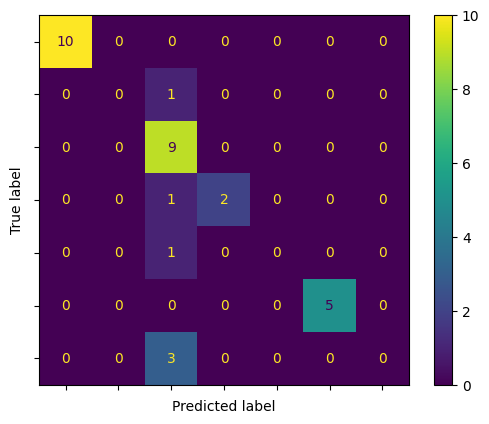

In [ ]:
cm = confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[])
cm_display.plot()

In [ ]:
# 결정트리 -> 랜덤포레스트(쉬움), XGBoost(어려움)

# 랜덤포레스트(결정트리100개) > 결정트리
# 1. 안정적
# 2. 모든 특성을 다 쓰지는 않음: 과대적합 잘 안남
# 3. 데이터분할X

from sklearn.ensemble import RandomForestClassifier

fish2 = pd.read_csv("data/fish2.csv")

X = fish2.iloc[:, 1::]
y = fish2["Species"]

rfc = RandomForestClassifier(oob_score=True, random_state=42)
rfc.fit(X, y)
print(rfc.oob_score_)

0.7861635220125787


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression # 회귀모델이 아니라 분류모델임, 선형회귀 + 시그모이드

fish2 = pd.read_csv("data/fish2.csv")

X = fish2.iloc[:, 1::]
y = fish2["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kn = LogisticRegression()
kn.fit(X_train, y_train)

c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [ ]:
import numpy as np

np.round(model.predict_proba(X_test), 3)

c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([[0.038, 0.192, 0.423, 0.   , 0.346, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.71 , 0.161, 0.032, 0.   , 0.097],
       [0.038, 0.192, 0.423, 0.   , 0.346, 0.   , 0.   ],
       [0.038, 0.192, 0.423, 0.   , 0.346, 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.038, 0.192, 0.423, 0.   , 0.346, 0.   , 0.   ],
       [0.038, 0.192, 0.423, 0.   , 0.346, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.71 , 0.161, 0.032, 0.   , 0.097],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.038, 0.192, 0.423, 0.   , 0.346, 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.038,

---

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import random

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

url = requests.get("https://finance.naver.com/item/sise_day.naver?code=005930&page=1", headers=headers)

In [2]:
html = BeautifulSoup(url.text)
html

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버 증권</title>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/css/newstock.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/css/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/css/layout.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/css/main.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/css/newstock2.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/css/newstock3.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/css/world.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<script language="

In [4]:
import pandas as pd

table = html.find("table", "type2")
table = pd.read_html(str(table))[0].dropna()
table

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.08.04,68300.0,500.0,68800.0,69100.0,68200.0,12264643.0
2,2023.08.03,68800.0,1100.0,69900.0,70200.0,68500.0,20087090.0
3,2023.08.02,69900.0,1200.0,70700.0,71000.0,69800.0,13835020.0
4,2023.08.01,71100.0,1300.0,70100.0,71200.0,70000.0,12299254.0
5,2023.07.31,69800.0,800.0,70900.0,71000.0,69800.0,13035420.0
9,2023.07.28,70600.0,1100.0,71800.0,72400.0,70100.0,19420683.0
10,2023.07.27,71700.0,1900.0,69900.0,71700.0,69300.0,24261179.0
11,2023.07.26,69800.0,200.0,69800.0,70600.0,68100.0,30016221.0
12,2023.07.25,70000.0,400.0,70000.0,70500.0,69800.0,14314945.0
13,2023.07.24,70400.0,100.0,70100.0,70900.0,69900.0,13418597.0


In [5]:
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 13
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      10 non-null     object 
 1   종가      10 non-null     float64
 2   전일비     10 non-null     float64
 3   시가      10 non-null     float64
 4   고가      10 non-null     float64
 5   저가      10 non-null     float64
 6   거래량     10 non-null     float64
dtypes: float64(6), object(1)
memory usage: 640.0+ bytes


In [6]:
last_page = int(html.find("td", "pgRR").find('a')["href"].split('=')[-1])
last_page

681

In [7]:
from tqdm import tqdm

total = []

for n in tqdm(range(last_page)):
    url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code=005930&page={n+1}", headers=headers)
    html = BeautifulSoup(url.text)

    table = html.find("table", "type2")
    table = pd.read_html(str(table))[0].dropna()
    total.append(table)
    time.sleep(random.random() + 1)

  0%|          | 0/681 [00:00<?, ?it/s]

100%|██████████| 681/681 [18:04<00:00,  1.59s/it]


In [2]:
import pandas as pd

samsung = pd.concat(total, ignore_index=True)
samsung = samsung.drop(0)
del samsung["전일비"]
samsung

NameError: name 'total' is not defined

In [ ]:
X_test

In [ ]:
from sklearn.ensemble import RandomForestRegressor

samsung["날짜"] = pd.to_datetime(samsung["날짜"])
samsung = samsung.sort_index(ascending=True)
samsung = samsung.set_index("날짜")
samsung = samsung.sort_index()

# ~2021년까지 학습 // 2022~현재 시험
train = samsung[samsung.index.year <= 2021]
test = samsung[samsung.index.year > 2021]

X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

X_test = test.iloc[:-1].values
y_test = test.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.9673826947422028

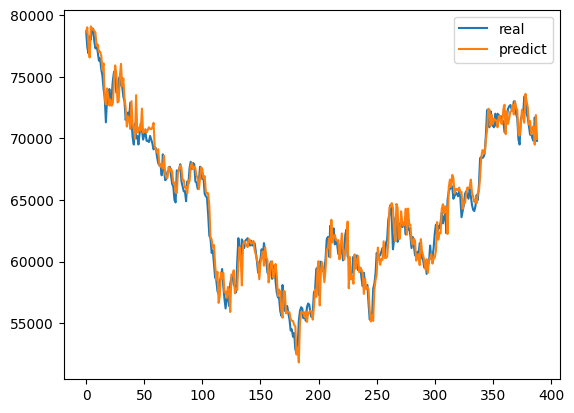

In [ ]:
plt.plot(y_test)
plt.plot(rf.predict(X_test))
plt.legend(["real", "predict"])

---

In [ ]:
samsung2 = samsung
samsung2.loc[:"2018-5-3", ["종가", "시가", "고가", "저가"]] = samsung2.loc[:"2018-5-3", ["종가", "시가", "고가", "저가"]] / 50
samsung2

,종가,시가,고가,저가,거래량
날짜,,,,,
1996-06-26,1354.0,1352.0,1358.0,1320.0,136630.0
1996-06-27,1338.0,1350.0,1354.0,1334.0,155450.0
1996-06-28,1362.0,1346.0,1370.0,1344.0,138430.0
1996-06-29,1370.0,1362.0,1382.0,1342.0,96710.0
1996-07-01,1440.0,1380.0,1446.0,1376.0,147310.0
...,...,...,...,...,...
2023-07-25,70000.0,70000.0,70500.0,69800.0,14314945.0
2023-07-26,69800.0,69800.0,70600.0,68100.0,30016221.0
2023-07-27,71700.0,69900.0,71700.0,69300.0,24261179.0


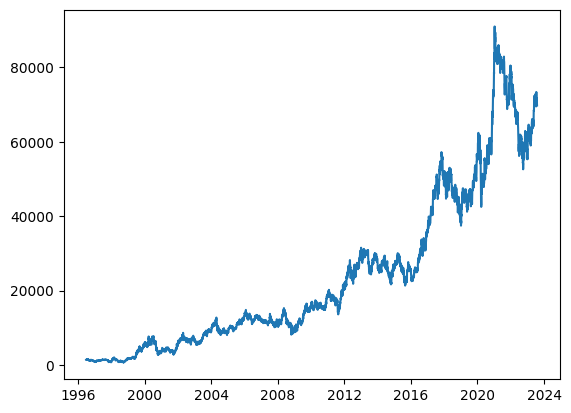

In [ ]:
plt.plot(samsung2["종가"])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#samsung["날짜"] = pd.to_datetime(samsung["날짜"])
#samsung = samsung.sort_index(ascending=True)
#samsung = samsung.set_index("날짜")
X = samsung2.iloc[:-1].values
y = samsung2.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
rf.score(X, y)

0.9999026746677399

In [ ]:
a = samsung.iloc[-1].values
a

array([   69800.,    70900.,    71000.,    69800., 13035420.])

In [ ]:
rf.predict([a])

array([69889.])

---

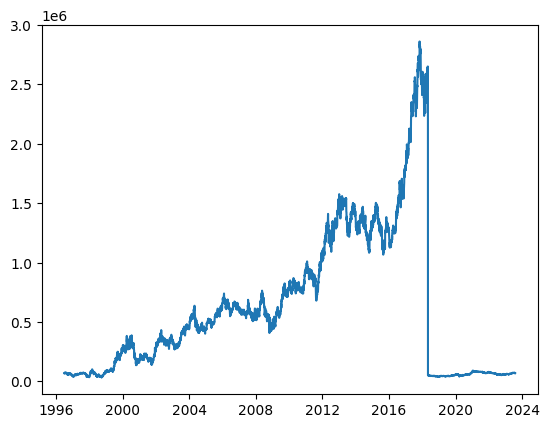

In [ ]:
plt.plot(samsung.index, samsung["종가"])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#samsung["날짜"] = pd.to_datetime(samsung["날짜"])
#samsung = samsung.sort_index(ascending=True)
#samsung = samsung.set_index("날짜")
samsung = samsung.sort_index()

# ~2021년까지 학습 // 2022~현재 시험

X = samsung.iloc[:-1].values
y = samsung.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
rf.score(X, y)

0.9999026746677399

In [ ]:
a = samsung.iloc[-1].values
a

array([   69800.,    70900.,    71000.,    69800., 13035420.])

In [ ]:
rf.predict([a])

array([69889.])

---
### APPL

In [2]:
# 강사님은 랜덤포레스트, K최근점만 쓰심
# 딥러닝: 58~65%
# 랜덤포레스트: 55~65%
# K최근점: 60%

# 세 모델이 모두 오른 경우에만!
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [5]:
appl = pd.read_csv("data/appl.csv")
appl

,Date,Price,Open,High,Low,Vol.,Change %
0,06/12/2023,183.79,181.27,183.89,180.97,53.57M,1.56%
1,06/09/2023,180.96,181.50,182.23,180.63,48.90M,0.22%
2,06/08/2023,180.57,177.90,180.84,177.46,50.21M,1.55%
3,06/07/2023,177.82,178.44,181.21,177.32,61.94M,-0.78%
4,06/06/2023,179.21,179.96,180.12,177.43,64.34M,-0.21%
...,...,...,...,...,...,...,...
4995,08/08/2003,0.35,0.36,0.36,0.35,137.85M,-2.78%
4996,08/07/2003,0.36,0.35,0.36,0.35,174.97M,2.86%
4997,08/06/2003,0.35,0.36,0.36,0.35,245.47M,-2.78%
4998,08/05/2003,0.36,0.38,0.38,0.36,249.44M,-5.26%


In [5]:
appl["Date"] = pd.to_datetime(appl["Date"])
appl = appl.set_index("Date")
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-07-31,196.45,196.06,196.49,195.26,38.59M,0.32%
2023-07-28,195.83,194.67,196.63,194.14,48.29M,1.35%
2023-07-27,193.22,196.02,197.20,192.55,47.46M,-0.66%
2023-07-26,194.50,193.67,195.64,193.32,47.47M,0.45%
2023-07-25,193.62,193.33,194.44,192.91,37.28M,0.45%
...,...,...,...,...,...,...
2020-10-07,115.08,114.62,115.55,114.13,96.85M,1.70%
2020-10-06,113.16,115.70,116.12,112.25,161.50M,-2.87%
2020-10-05,116.50,113.91,116.65,113.55,106.24M,3.08%


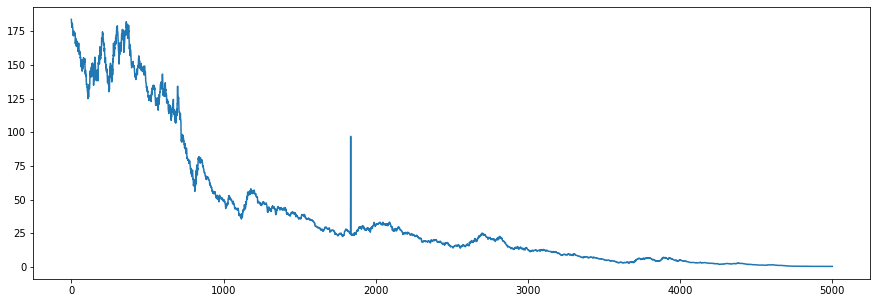

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(appl.index, appl["Price"])

In [7]:
from sklearn.ensemble import RandomForestRegressor

# ~2021년까지 학습 // 2022~현재 시험
train = appl[appl.index.year <= 2021]
test = appl[appl.index.year > 2021]

X_train = train.iloc[:-1].values
y_train = train.iloc[1:, 0].values

X_test = test.iloc[:-1].values
y_test = test.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


AttributeError: 'RangeIndex' object has no attribute 'year'

---

In [20]:
df = pd.read_csv("data/pima-indians-diabetes.csv", header=None)
df.columns = ["Pregnant", "Plasma", "Pressure", "Thickness", "Insulin", "BMI", "Pedigree", "Age", "Class"]
df

,Pregnant,Plasma,Pressure,Thickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pregnant   768 non-null    int64  
 1   Plasma     768 non-null    int64  
 2   Pressure   768 non-null    int64  
 3   Thickness  768 non-null    int64  
 4   Insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   Pedigree   768 non-null    float64
 7   Age        768 non-null    int64  
 8   Class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot: >

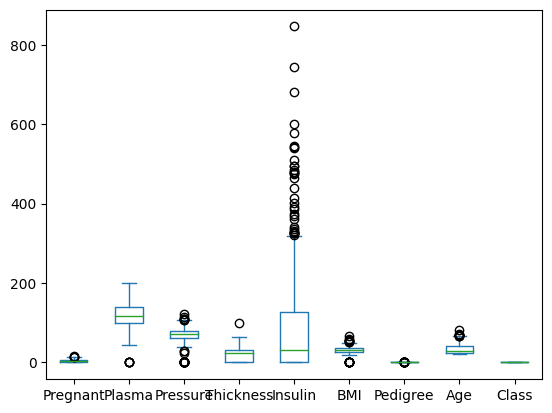

In [ ]:
df.plot.box()

In [ ]:
# Randomforest

X = df.iloc[:, :-1]
y = df["Class"]

rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(X, y)
print(rf.oob_score_)

0.7552083333333334



accuracy: 0.7467532467532467 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



c:\Users\haseong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


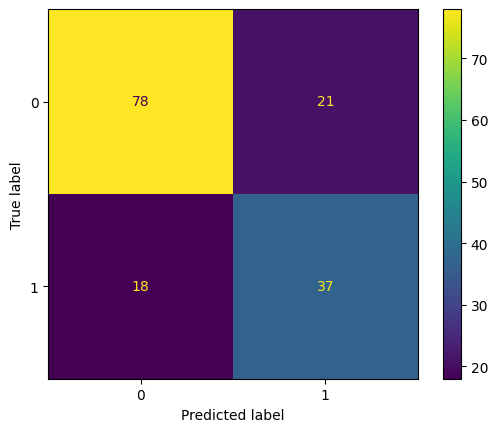

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression # 회귀모델이 아니라 분류모델임, 선형회귀 + 시그모이드
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = df.iloc[:, :-1]
y = df["Class"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
ss.fit_transform(X_train)
ss.transform(X_test)

lg = LogisticRegression(random_state=42)
lg.fit(X_train, y_train)

yhat = lg.predict(X_test)

print()
print(f'accuracy: {lg.score(X_test, y_test)}', '\n')
print(classification_report(y_test, yhat))

cm = confusion_matrix(y_test, yhat)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [ ]:
print(len(df.columns[:-1]))

8


In [ ]:
X

,Pregnant,Plasma,Pressure,Thickness,Insulin,BMI,Pedigree,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


---
### bike.csv
### 회귀

In [11]:
bike = pd.read_csv("data/bike.csv")
del bike["registered"]
del bike["windspeed"]

# Count 예측
# feature들에 따라 자전거 대여수가 얼마나 달라지는지

bike["datetime"] = pd.to_datetime(bike["datetime"])

bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike["weekday"] = bike["datetime"].dt.weekday

del bike["datetime"]

bike

,season,holiday,workingday,weather,temp,atemp,humidity,casual,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,3,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,8,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,5,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,3,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,7,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,10,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,4,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,12,129,2012,12,19,22,2


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   casual      10886 non-null  int64  
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
 13  weekday     10886 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.2 MB


<AxesSubplot: >

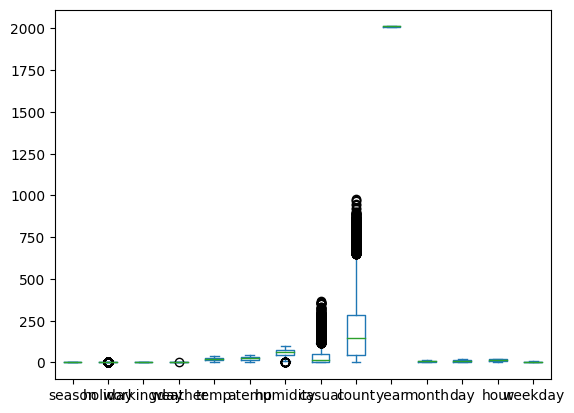

In [13]:
bike.plot.box()

<AxesSubplot: xlabel='hour', ylabel='count'>

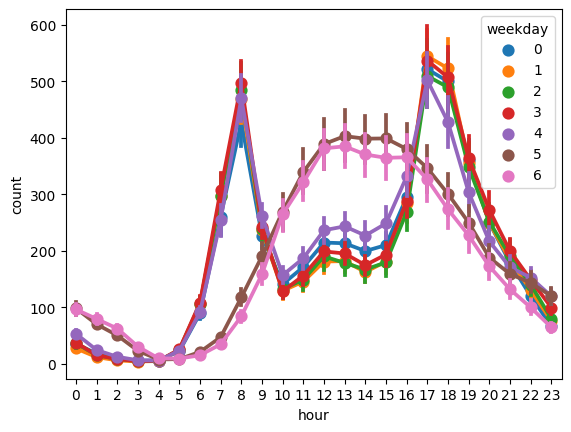

In [19]:
sns.pointplot(data=bike, x="hour", y="count", hue="weekday")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

bike = pd.read_csv("data/bike.csv")
del bike["registered"]
del bike["windspeed"]

# Count 예측
# feature들에 따라 자전거 대여수가 얼마나 달라지는지

bike["datetime"] = pd.to_datetime(bike["datetime"])

bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["day"] = bike["datetime"].dt.hour
bike["weekday"] = bike["datetime"].dt.weekday

del bike["datetime"]
# Count 예측
# feature들에 따라 자전거 대여수가 얼마나 달라지는지

X = bike.drop(["count"], axis=1).values
y = bike["count"].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
ss.fit_transform(X)
# X_train = ss.fit_transform(X_train)
# X_test = ss.transform(X_test)
# ms = MinMaxScaler()
# X_train = ms.fit_transform(X_train)
# X_test = ms.transform(X_test)

rf = RandomForestRegressor(oob_score=True, random_state=42)
rf.fit(X, y)

print(rf.oob_score_)

0.9707319424361915


---
# Deep Learning

In [1]:
from tensorflow import keras

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

bike = pd.read_csv("data/bike.csv")
del bike["registered"]
del bike["windspeed"]

# Count 예측
# feature들에 따라 자전거 대여수가 얼마나 달라지는지

bike["datetime"] = pd.to_datetime(bike["datetime"])

bike["year"] = bike["datetime"].dt.year
bike["month"] = bike["datetime"].dt.month
bike["day"] = bike["datetime"].dt.day
bike["hour"] = bike["datetime"].dt.hour
bike["weekday"] = bike["datetime"].dt.weekday

del bike["datetime"]

bike

,season,holiday,workingday,weather,temp,atemp,humidity,casual,count,year,month,day,hour,weekday
0,1,0,0,1,9.84,14.395,81,3,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,8,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,5,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,3,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,7,336,2012,12,19,19,2
10882,4,0,1,1,14.76,17.425,57,10,241,2012,12,19,20,2
10883,4,0,1,1,13.94,15.910,61,4,168,2012,12,19,21,2
10884,4,0,1,1,13.94,17.425,61,12,129,2012,12,19,22,2


In [83]:
from sklearn.preprocessing import StandardScaler

X = bike.drop(["count"], axis=1).values
y = bike["count"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [84]:
X.shape, y.shape # 문제지(2차원 행렬), 정답지(1차원 행렬)

((10886, 13), (10886,))

In [85]:
X_train.shape, y_train.shape

((7620, 13), (7620,))

In [86]:
X_test.shape, y_test.shape

((3266, 13), (3266,))

In [87]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

model = keras.Sequential()  # 인공신경망을 만드는 도화지
model.add(keras.layers.Dense(1, input_shape=(13, )))
model.add(keras.layers.Dense(1))

model.compile(loss="mse", metrics="mae", optimizer="adam")

hist = model.fit(X_train, y_train, epochs=10,
                 validation_data = (X_test, y_test))

Epoch 1/10
239/239 [==============================] - 1s 1ms/step - loss: 69458.1016 - mae: 191.2109 - val_loss: 94284.5703 - val_mae: 252.7726
Epoch 2/10
239/239 [==============================] - 0s 815us/step - loss: 69097.4062 - mae: 190.7516 - val_loss: 34648.2617 - val_mae: 161.9897
Epoch 3/10
239/239 [==============================] - 0s 857us/step - loss: 68417.8438 - mae: 190.0245 - val_loss: 753629.6875 - val_mae: 856.9734
Epoch 4/10
239/239 [==============================] - 0s 838us/step - loss: 67445.6875 - mae: 189.0318 - val_loss: 3935759.2500 - val_mae: 1979.8845
Epoch 5/10
239/239 [==============================] - 0s 828us/step - loss: 66229.7109 - mae: 187.8410 - val_loss: 11593905.0000 - val_mae: 3402.1228
Epoch 6/10
239/239 [==============================] - 0s 807us/step - loss: 64817.4336 - mae: 186.4478 - val_loss: 26281168.0000 - val_mae: 5123.1328
Epoch 7/10
239/239 [==============================] - 0s 958us/step - loss: 63258.1758 - mae: 184.8819 - val_loss:

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


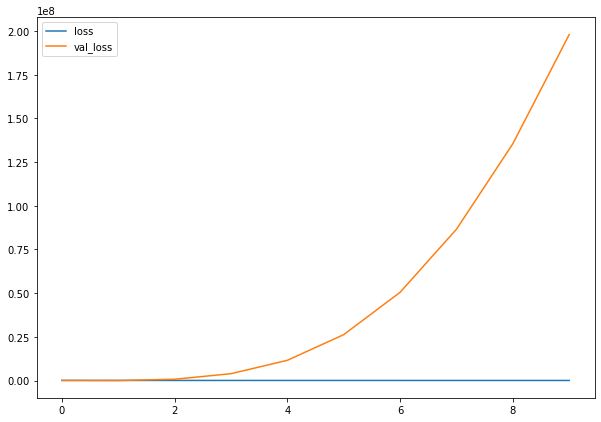

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(hist.history['loss'])
plt.plot(hist.history["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()